# Notes on using Python For Scientific Applications

Neal Gordon   
2016-02-22  

### index  
[Math with Python](#Math-with-Python)  
[Ipython Widgets](#Ipython-Widgets)

## Math with Python  
[index](#index)

WHen using ipython, variables and modules can be stored in the console. Use ```%reset``` to remove any modules and variables from the kernal 

The modules used for math are ```numpy``` , ```scipy``` and ```matplotlib```

All the these modules can be accessed with the module ```pylab```, but is not updated as regular as the other packages.

the linear algebra system in python via numpy and scipy is 
a bit awkward at first, but once the nuances are understood
it has most of the functionality of MATLAB with zero the cost

The matrix class of scipy is handy but limits the type of data stored.
 As with MATLAB all "arrays" or "matrices" are just matrices. This is not true with python.
Thus, to avoid confusion, it is discouraged to use the matrix class

TO get started lets looks at numpy arrays, and then later we will use python powerful symbolic math package sympy for a different way to perform calculations

In [23]:
# import our modules
import numpy as np
from scipy import linalg

In [25]:
# lets creat some matrices (but recall use the array)
a = np.array([[1, 2], [3, 4]])
b = np.array([[1, 2,4],[5,6,7] ])
# createa 1x3 array
c = np.array([1,2,3])

In [26]:
a

array([[1, 2],
       [3, 4]])

In [27]:
b

array([[1, 2, 4],
       [5, 6, 7]])

In [28]:
c

array([1, 2, 3])

In [29]:
#does not  convert to 3x1 since it is only a 1d array
c.transpose()

array([1, 2, 3])

In [30]:
# we must reshape it
c.reshape((3,1))

array([[1],
       [2],
       [3]])

In [32]:
# or when we defined it, add brackets in it to create a true 1x3 array
c = np.array([[1,2,3]])
c

array([[1, 2, 3]])

In [33]:
# now we can transpose it.
c.transpose() 

array([[1],
       [2],
       [3]])

In [34]:
# lets create a 2x5 zeros matrix
c = np.zeros((2,5))
c

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [36]:
# to connect two arrays, use append
c = np.append(a,b,1)
c

array([[1, 2, 1, 2, 4],
       [3, 4, 5, 6, 7]])

In [37]:
# to multiple a matrix, use 
a @ b

array([[11, 14, 18],
       [23, 30, 40]])

In [38]:
# or 
np.dot(a,b)

array([[11, 14, 18],
       [23, 30, 40]])

In [39]:
# to solve, use 
linalg.solve(a,b)

array([[  3.00000000e+00,   2.00000000e+00,  -1.00000000e+00],
       [ -1.00000000e+00,   1.66533454e-16,   2.50000000e+00]])

In [40]:
# or slower and less accurate
linalg.inv(a) @ b

array([[  3.00000000e+00,   2.00000000e+00,  -1.00000000e+00],
       [ -1.00000000e+00,   4.44089210e-16,   2.50000000e+00]])

In [42]:
# or 
linalg.inv(a).dot(b)

array([[  3.00000000e+00,   2.00000000e+00,  -1.00000000e+00],
       [ -1.00000000e+00,   4.44089210e-16,   2.50000000e+00]])

With numpy, we can create arrays of numbers as well as functions that accept arrays

In [114]:
f = lambda x,y: sqrt(x**2+y**2)

In [115]:
f(3,4)

5.0

In [116]:
a = 3.1
b = arange(15,35, 0.75)
f(a,b)

array([ 15.31698404,  16.05218054,  16.78868667,  17.52633732,
        18.26499384,  19.00453893,  19.74487275,  20.48590979,
        21.2275764 ,  21.96980883,  22.7125516 ,  23.45575622,
        24.19938016,  24.9433859 ,  25.68774027,  26.43241381,
        27.1773803 ,  27.92261628,  28.66810074,  29.41381478,
        30.15974138,  30.90586514,  31.65217212,  32.39864966,
        33.14528624,  33.89207134,  34.63899537])

We can also perform numerical differentiation and integration

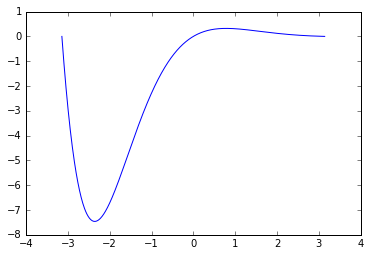

In [117]:
x = arange(-pi,pi, 0.01)
y = sin(x)*exp(-x)
plt.plot(x,y);

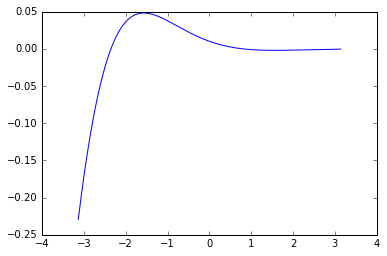

In [118]:
plt.plot(x[1:], diff(y));

Using the trapezoidal rule, we can numerically integrate the function

In [119]:
trapz(y,x)

-11.548547100901921

# Symbolic Math with Sympy 

in ipython use ```help(integrate)``` or ```integrate?``` to check syntax or learn about the command. To clear the previous modules use ```%reset``` to clear variables and imports.  

In [137]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [138]:
from sympy import *

Now we can initialize the console to have very nice looking mathematical expressions. If we dont do this, the text will be simple ascii characters

In [139]:
init_printing()

In [141]:
x,y = symbols('x y')

I really enjoy using sympy because I can type my equations in, evaluate them, and it shows them very nice, which is easier to read then lines of text. Simple expressions are easy to make

In [144]:
y = (pi + x)**2
y

In [150]:
y.subs(x,1.3)

In [151]:
# or to get a number
N(y.subs(x,1.3))

Calculus is also easy to implement

In [155]:
diff(y)

In [159]:
f = integrate(sin(x)*exp(-x),(x,-pi,pi ))
# as shown numerically, we can symbolically evaluate the function 
#  and get the same result
float(f)

Other various math tasks can be much easier when using sympy

In [162]:
n = symbols('n')

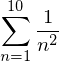

In [164]:
sum_fcn = Sum(1/n**2, (n,1,10))
sum_fcn

In [167]:
# to evaluate the summation simply add the evalf method
sum_fcn.evalf()

In [168]:
latex(sum_fcn)

'\\sum_{n=1}^{10} \\frac{1}{n^{2}}'

Since this is a windows machine, the latex command printed two backslashes, if we change that to single backslashes we can get the latex version of the summation 
$$
\sum_{n=1}^{10}\frac{1}{n^{2}}
$$

## Linear Algebra

Sympy also renders matrices with special charaters nicely

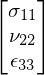

In [176]:
s11, n22, e33 = symbols("sigma11 nu22 epsilon33")
A = Matrix([[s11],[n22],[e33]])
A

In [179]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

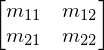

In [180]:
A = Matrix([[m11, m12],[m21, m22]])
A

In [181]:
b = Matrix([[b1], [b2]])
b

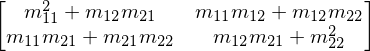

In [182]:
A**2

In [184]:
A.det()

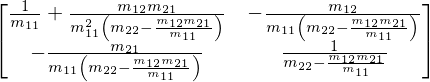

In [185]:
A.inv()

## Ipython Widgets 
[index](#index)  

In [5]:
from IPython.html.widgets import interact
from IPython.display import display

from sympy import Symbol, Eq, factor, init_printing
init_printing(use_latex='mathjax')

x = Symbol('x')

def factorit(n):
    display(Eq(x**n-1, factor(x**n-1)))

interact(factorit, n=(2,20));

 11               ⎛ 10    9    8    7    6    5    4    3    2        ⎞
x   - 1 = (x - 1)⋅⎝x   + x  + x  + x  + x  + x  + x  + x  + x  + x + 1⎠

In [6]:
from IPython.html import widgets # Widget definitions
from IPython.display import display # Used to display widgets in the notebook

In [7]:
mywidget = widgets.FloatSlider()

In [8]:
display(mywidget)

In [9]:
mywidget.keys

['_range',
 'width',
 'value',
 'border_width',
 'step',
 'font_weight',
 '_model_name',
 'font_family',
 '_model_module',
 'border_radius',
 '_css',
 'border_style',
 'border_color',
 'padding',
 'background_color',
 'color',
 'height',
 '_view_name',
 'version',
 'slider_color',
 'max',
 'margin',
 'msg_throttle',
 'visible',
 'orientation',
 '_dom_classes',
 'continuous_update',
 'font_style',
 'min',
 'readout',
 'description',
 '_view_module',
 'disabled',
 'font_size']

In [10]:
[widget for widget in dir(widgets) if widget.endswith('Widget')]

['DOMWidget', 'Widget']

In [11]:
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print("Button clicked.")

button.on_click(on_button_clicked)

Button clicked.
Button clicked.


# Plotting  
[index](#index)  

Type ```scientific``` into spyder to get info  

In [1]:
%matplotlib inline

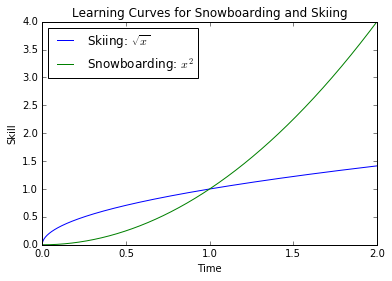

In [2]:
#%% plotting using matplotlib

#%% first example
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,2, 1000)
f = plt.figure()
plt.plot(x, np.sqrt(x), label = r"Skiing: $\sqrt{x}$")
plt.plot(x, x**2, label = r"Snowboarding: $x^2$")
plt.title("Learning Curves for Snowboarding and Skiing")
plt.xlabel("Time") ; plt.ylabel("Skill")
plt.legend(loc='upper left')
plt.show()

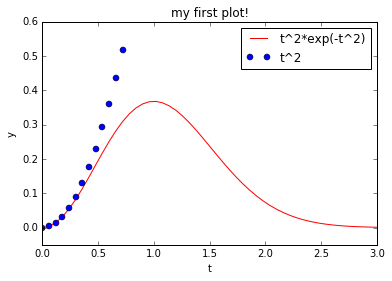

In [3]:
import matplotlib.pyplot as plt
del f
def f(t):
    return t**2*np.exp(-t**2)
t = np.linspace(0,3,51)
y = np.zeros(len(t))
for i in range(len(t)):
    y[i] = f(t[i])  
    
# or faster yet
y = f(t)
y2 = t**2
plt.plot(t,y,'-r')
plt.hold('on')
plt.plot(t,y2,'bo')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(['t^2*exp(-t^2)' , 't^2'])
plt.axis([ 0 , 3 , -0.05 ,  0.6])  #[tmin, tmax, ymin,ymax]
plt.title('my first plot!')
#savefig('newfig..eps')
plt.show()

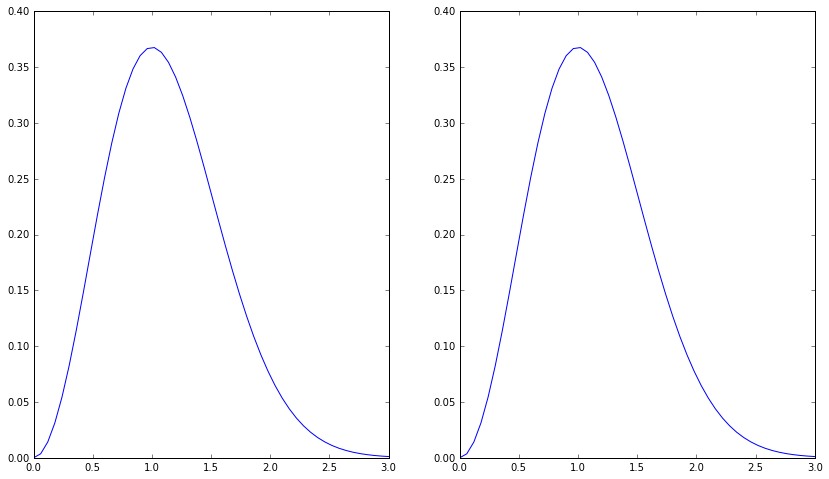

In [5]:
#can also use subplot command
f = plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(t,y)
plt.subplot(1,2,2)
plt.plot(t,y)
plt.show()
print('\n\n\n')

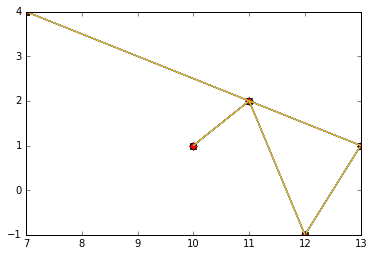

In [7]:
# Hold, if true, new plots will not erase the figure
plt.hold(True) 

y = np.array([1,2,-1,1,4])
t = np.array([10,11,12,13,7])
# line styles
plt.plot(t,y,'-')
plt.plot(t,y,'--')
plt.plot(t,y,'-.')
plt.plot(t,y,':')
# plot markers
plt.plot(t,y,'o')
plt.plot(t,y,'^')
plt.plot(t,y,'s')
plt.plot(t,y,'+')
plt.plot(t,y,'x')
plt.plot(t,y,'D') # diamond
# plot color
plt.plot(t,y,'b')
plt.plot(t,y,'c')
plt.plot(t,y,'g')
plt.plot(t,y,'k')
plt.plot(t,y,'m')
plt.plot(t,y,'r')
plt.plot(t,y,'w')
plt.plot(t,y,'y')

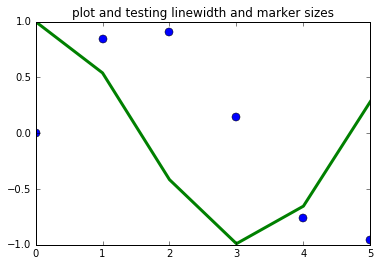

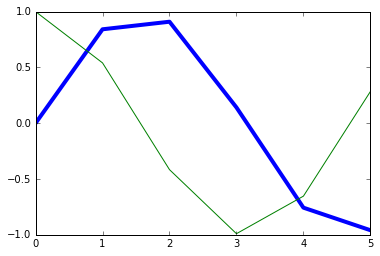

In [8]:

y = np.array([1,2,-1,1,4])
t = np.array([10,11,12,13,7])
# plot markers and line styles with multiple data sets
plt.plot(t,y,'D-.')
plt.plot(t,y,'+',t,2*y,'o--')
# markersize and line styles
i = np.arange(6)
plt.plot(i, np.sin(i), 'o', i, np.cos(i),'-', linewidth=3, markersize=8)
plt.hold(False)
plt.plot(i, np.sin(i), 'o', i, np.cos(i),'-', lw=3, ms=8)
plt.title('plot and testing linewidth and marker sizes')
# can also use hold to plot with different parameters
plt.figure() ; plt.hold(True)
I = np.arange(6)
plt.plot(I,np.sin(I), lw=4)
plt.plot(I,np.cos(I), lw=1)

(0.0, 4.0, -2.5, 1.0)

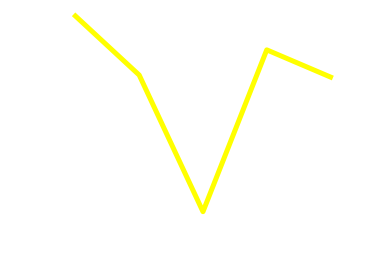

In [13]:
# import all the matplotlib names into the workspace
from matplotlib.pyplot import *
from numpy import *

plot(random.randn(5), color='#ffff00',lw=5)

# axis , pg 194, beginning python visualzation
axis()
axis('auto')
axis('tight')
axis('off') # removes axis and labels
axis('equal') # good for gps plots
# axis([xmin,xmax,ymin,ymax])

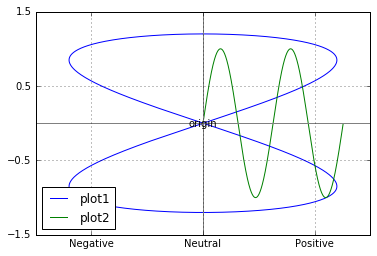

In [14]:
#plotting example with grid and xtick
R=1.2
I = arange(0, 4*pi, 0.01)
plot(sin(I)*R, cos(0.5*I)*R,label='plot1')
plot(I/10, sin(I),label='plot2')
axhline(color = 'gray')
axvline(color='gray')
grid(True)
xticks([-1,0,1] , ('Negative','Neutral','Positive'))
yticks(arange(-1.5, 2.0,1))
legend(loc='best')
legend(loc='lower left')
text(0,0, 'origin', verticalalignment='center', horizontalalignment='center')

([], <a list of 0 Text yticklabel objects>)

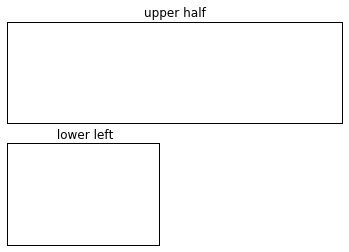

In [15]:
# subplots
figure()
subplot(2,1,1)
xticks([]) ; yticks([])
title('upper half')
subplot(2,2,3)
title(' lower left')
xticks([]) ; yticks([])

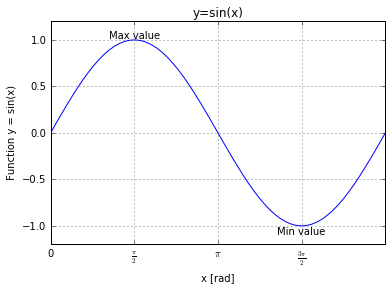

In [16]:
I = arange(0, 2*pi+0.1, 0.1)
plot(I,sin(I), label='sin(I)')
title('y=sin(x)')
xlabel('x [rad]')
ylabel(' Function y = sin(x)')
text(pi/2,1, 'Max value', ha = 'center', va='bottom')
text(3*pi/2,-1, 'Min value', ha = 'center', va='top')
xticks(arange(0, 2*pi, pi/2), 
       ('0', r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3\pi}{2}$'))
xlim([0, 2*pi])
ylim([-1.2, 1.2])
grid() 

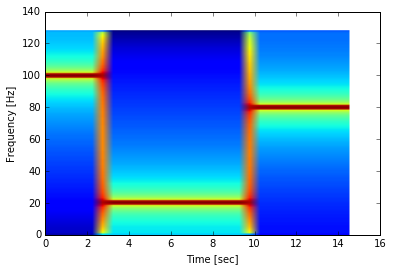

In [17]:
# many other plots , see pg 210 of beginning python visualzation
Fs = 256
times = [3,7,5]
frequencies = [100,20,80]

y = array([])
for t,f in zip(times, frequencies):
    x = cos(2*pi*arange(t*Fs)/Fs*f)
    y = append(y,x)
specgram(y,256,Fs)
xlabel('Time [sec]')
ylabel('Frequency [Hz]')

  visible: [True | False]         
  label: string or anything printable with '%s' conversion.         
  linewidth: float value in points         


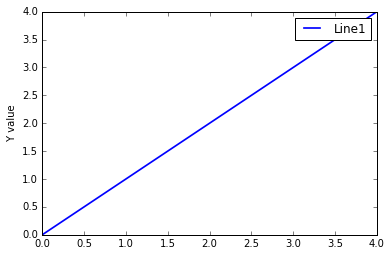

In [18]:
# getting and setting plot values using getp() and setp()
from pylab import *
p = plot(arange(5))
type(p)
type(p[0])
# see whaty values are accepted
setp(p[0],'visible')
setp(p[0],visible=True)
setp(p[0],'label')
setp(p[0], label='Line1')
setp(p[0],'linewidth')
setp(p[0],linewidth=1.7)
getp(p[0], 'linewidth')
legend()

# using gcf() and gca()
setp(gca(), ylabel = ' Y value')

    agg_filter = None
    alpha = None
    animated = False
    axes = [<matplotlib.axes._subplots.AxesSubplot object at ...
    children = [<matplotlib.patches.Rectangle object at 0x000001E...
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    default_bbox_extra_artists = [<matplotlib.axes._subplots.AxesSubplot object at ...
    dpi = 80.0
    edgecolor = (1, 1, 1, 0)
    facecolor = (1, 1, 1, 0)
    figheight = 4.0
    figure = None
    figwidth = 6.0
    frameon = True
    gid = None
    label = 
    path_effects = []
    picker = None
    rasterized = None
    size_inches = [ 6.  4.]
    sketch_params = None
    snap = None
    tight_layout = False
    transform = IdentityTransform()
    transformed_clip_path_and_affine = (None, None)
    url = None
    visible = True
    window_extent = TransformedBbox(Bbox([[0.0, 0.0], [6.0, 4.0]]), Af...
    zorder = 0


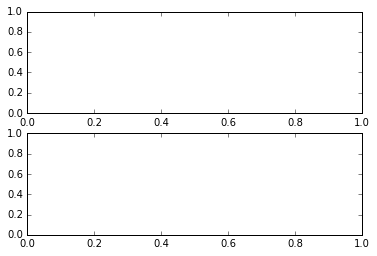

In [19]:
# using the objects of the plots
from pylab import *
def number_subplots(fignum):
    ''' returns the number of subplots in a figure'''
    # switch to the current figure    
    figure(fignum)    
    fig = gcf()    
    for i, fig_axe in enumerate(getp(fig, 'axes')):
        fig_axe.set_title(str(i+1))
    axis()

figure()
ax1 = subplot(2,1,1)
ax2 = subplot(2,1,2)
getp(gcf())
getp(gcf(), 'axes')

In [20]:
# show all the objects of matplotlib
matobj = gcf()
[func for func in dir(matobj) if func.startswith('get')]

['get_agg_filter',
 'get_alpha',
 'get_animated',
 'get_axes',
 'get_children',
 'get_clip_box',
 'get_clip_on',
 'get_clip_path',
 'get_contains',
 'get_cursor_data',
 'get_default_bbox_extra_artists',
 'get_dpi',
 'get_edgecolor',
 'get_facecolor',
 'get_figheight',
 'get_figure',
 'get_figwidth',
 'get_frameon',
 'get_gid',
 'get_label',
 'get_path_effects',
 'get_picker',
 'get_rasterized',
 'get_size_inches',
 'get_sketch_params',
 'get_snap',
 'get_tight_layout',
 'get_tightbbox',
 'get_transform',
 'get_transformed_clip_path_and_affine',
 'get_url',
 'get_visible',
 'get_window_extent',
 'get_zorder']